In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 7.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 79.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 18.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.5 MB/s 

In [2]:
from pycaret.regression import *
import pandas as pd
import yfinance as yf

In [10]:
df = yf.download("AAPL", start="2015-01-01", end="2016-01-01")

[*********************100%%**********************]  1 of 1 completed


In [11]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,24.466446,212818400
2015-01-05,27.072500,27.162500,26.352501,26.562500,23.777187,257142000
2015-01-06,26.635000,26.857500,26.157499,26.565001,23.779430,263188400
2015-01-07,26.799999,27.049999,26.674999,26.937500,24.112864,160423600
2015-01-08,27.307501,28.037500,27.174999,27.972500,25.039341,237458000


In [12]:
df = df.drop(columns=['Adj Close'])
df["Ticker"] = "AAPL"
df = df.dropna()

In [13]:
df

,Open,High,Low,Close,Volume,Ticker
Date,,,,,,
2015-01-02,27.847500,27.860001,26.837500,27.332500,212818400,AAPL
2015-01-05,27.072500,27.162500,26.352501,26.562500,257142000,AAPL
2015-01-06,26.635000,26.857500,26.157499,26.565001,263188400,AAPL
2015-01-07,26.799999,27.049999,26.674999,26.937500,160423600,AAPL
2015-01-08,27.307501,28.037500,27.174999,27.972500,237458000,AAPL
...,...,...,...,...,...,...
2015-12-24,27.250000,27.250000,26.987499,27.007500,54281600,AAPL
2015-12-28,26.897499,26.922501,26.545000,26.705000,106816800,AAPL
2015-12-29,26.740000,27.357500,26.715000,27.184999,123724800,AAPL


In [14]:
s = setup(df, target = 'Open', session_id = 123)

,Description,Value
0,Session id,123
1,Target,Open
2,Target type,Regression
3,Original data shape,"(252, 6)"
4,Transformed data shape,"(252, 6)"
5,Transformed train set shape,"(176, 6)"
6,Transformed test set shape,"(76, 6)"
7,Numeric features,4
8,Categorical features,1
9,Preprocess,True


In [15]:
exp = RegressionExperiment()

In [16]:
exp.setup(df, target = 'Open', session_id = 123)


,Description,Value
0,Session id,123
1,Target,Open
2,Target type,Regression
3,Original data shape,"(252, 6)"
4,Transformed data shape,"(252, 6)"
5,Transformed train set shape,"(176, 6)"
6,Transformed test set shape,"(76, 6)"
7,Numeric features,4
8,Categorical features,1
9,Preprocess,True


In [17]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.1202,0.0320,0.1675,0.9918,0.0057,0.0041,0.5720
lar,Least Angle Regression,0.1237,0.0295,0.1670,0.9918,0.0056,0.0042,0.0930
br,Bayesian Ridge,0.1202,0.0320,0.1675,0.9918,0.0057,0.0041,0.0550
ridge,Ridge Regression,0.1250,0.0336,0.1708,0.9914,0.0058,0.0043,0.0900
et,Extra Trees Regressor,0.1900,0.1189,0.2865,0.9725,0.0098,0.0065,0.2740
rf,Random Forest Regressor,0.2006,0.1164,0.2933,0.9721,0.0100,0.0069,0.2080
ada,AdaBoost Regressor,0.2122,0.1193,0.3014,0.9712,0.0103,0.0073,0.2100
gbr,Gradient Boosting Regressor,0.2055,0.1345,0.3122,0.9669,0.0107,0.0071,0.1780
lightgbm,Light Gradient Boosting Machine,0.2253,0.1461,0.3241,0.9650,0.0111,0.0078,0.1730
en,Elastic Net,0.3586,0.2043,0.4439,0.9452,0.0148,0.0122,0.0910


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

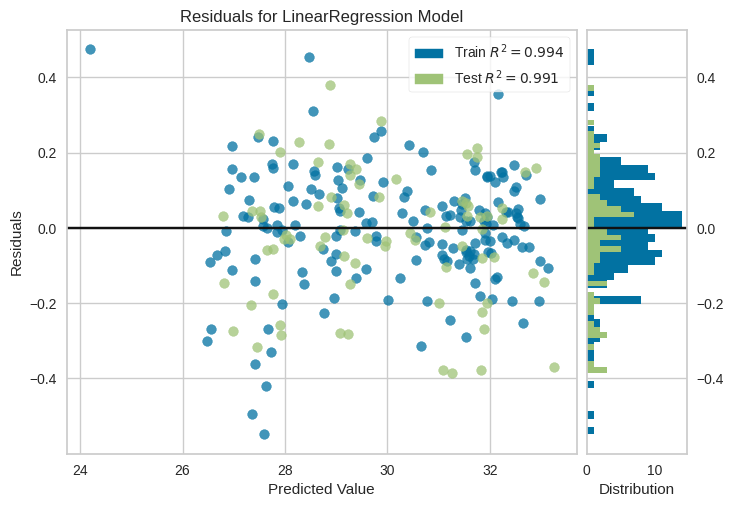

In [18]:
plot_model(best, plot = 'residuals')